Task 4: For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

In [123]:
#Importing the libraries
import pandas as pd
import sklearn.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
#Importing the iris dataset

#iris = "https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view"
path = 'https://drive.google.com/uc?export=download&id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-'
df=pd.read_csv(path)

'''
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target
print(y)
print(type(y))


y=df["Species"]
print("Length of species column is",len(y))
'''
print("Dataset loaded")

Dataset loaded


In [125]:
#Printing the dataset and defining the target
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [126]:
#Exploring the dataset
df.shape

(150, 6)

In [127]:
#Printing the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [128]:
#Dropping the id column
df.drop(['Id'],axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [129]:
#Checking the null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [130]:
#Converting variable data in numerical data
import sklearn
from sklearn.preprocessing import LabelEncoder
num=LabelEncoder()
df['Species']=num.fit_transform(df['Species'].astype('str'))

In [131]:
#Printing the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [132]:
#Preparing the data i.e dividing data in attributes and lables
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [133]:
#Splitting data in training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [134]:
#Training the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=1)
classifier.fit(x_train,y_train)
print("Training completed")

Training completed


In [135]:
#Printing the score
classifier.score(x_test,y_test)

0.9666666666666667

In [136]:
#Making predictions on testing data
y_predict = classifier.predict(x_test)

In [137]:
#Calculating accuracy of algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



[Text(200.88000000000002, 271.8, 'X[0] <= 99.5\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(133.92000000000002, 163.08, 'X[3] <= 2.6\ngini = 0.5\nsamples = 76\nvalue = [39, 37, 0]'),
 Text(66.96000000000001, 54.360000000000014, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(200.88000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(267.84000000000003, 163.08, 'gini = 0.0\nsamples = 44\nvalue = [0, 0, 44]')]

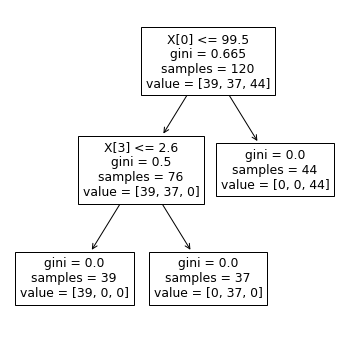

In [138]:
#Visualizing using decision tree
from sklearn import tree
plt.figure(figsize=(6,6))
graph=tree.plot_tree(classifier)
graph

In [139]:
#Decision tree with the testing data
classifier2 = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=1)
classifier2.fit(x_test,y_test)

DecisionTreeClassifier(max_depth=5, random_state=1)

[Text(133.92000000000002, 271.8, 'X[0] <= 48.5\ngini = 0.638\nsamples = 30\nvalue = [11, 13, 6]'),
 Text(66.96000000000001, 163.08, 'gini = 0.0\nsamples = 11\nvalue = [11, 0, 0]'),
 Text(200.88000000000002, 163.08, 'X[0] <= 101.5\ngini = 0.432\nsamples = 19\nvalue = [0, 13, 6]'),
 Text(133.92000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0]'),
 Text(267.84000000000003, 54.360000000000014, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6]')]

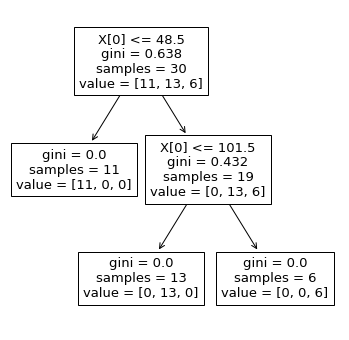

In [141]:
#Plotting the decision tree
plt.figure(figsize=(6,6))
graph=tree.plot_tree(classifier2)
graph